# Guided Project: Police killings

# 1: Introduction

Due in part to recent high-profile shootings of civilians by police in the US, the media and public have been scrutinizing police killings heavily. If you browse social media and news sites, you may get the sense that there's been a large uptick in civilian shootings by police in the US.

As a data scientists, we may want to investigate police killings more and get to the facts. Luckily, there's a dataset that will help us do this. The team at FiveThirtyEight (http://fivethirtyeight.com/) assembled a dataset using crowdsourced data and census data. It contains information on each police killing in the US, and can be found here https://github.com/fivethirtyeight/data/tree/master/police-killings.

Each of the 467 rows in the dataset contains information on a police killing of a civilian in the US in from January 2015 to June 2015. There are many interesting columns in the dataset, but here are some of the more relevant ones:

name -- the name of the civilian.
age -- the age of the civilian.
gender -- the gender of the civilian.
raceethnicity -- the race and ethnicity of the civilian.
month, day, and year -- when the shooting occurred.
streetaddress, city, state -- where the shooting occurred.
lawenforcementagency -- the agency that was involved.
cause -- the cause of death.
armed -- whether or not the civilian was armed.
pop -- population of the census area where the incident occurred.
county_income -- median household income in the county.

For a full listing of the columns, look here https://github.com/fivethirtyeight/data/tree/master/police-killings. 
Read more about the methodology used to gather the data here https://github.com/dataquestio/solutions/blob/master/Mission202Solution.ipynb.

We'll be exploring various columns related to the shootings 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

police_killings = pd.read_csv("D://YandexDisk//ML//Dataquest//police_killings.csv", encoding="ISO-8859-1")
police_killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [12]:
police_killings.describe()

C:\Users\andrpotapov\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,467.000000,467.0,467.000000,467.000000,467.000000,467.000000,467.000000,4.670000e+02,467.000000,467.000000,465.000000,467.000000,465.000000,440.000000,465.000000,465.000000,465.000000
mean,15.830835,2015.0,36.403224,-96.972666,25.342612,91.584582,236936.614561,2.543443e+10,25434.197002,4783.719486,46627.182796,52527.331906,0.895913,2.497727,2.496774,0.117399,0.220217
std,8.658970,0.0,5.193357,16.953842,16.766458,110.185129,341262.721715,1.680140e+10,16801.379755,2374.565749,20511.194907,12948.263811,0.333584,1.393115,1.298412,0.069175,0.158347
min,1.000000,2015.0,19.915194,-159.642700,1.000000,1.000000,100.000000,1.003010e+09,1003.000000,0.000000,10290.000000,22545.000000,0.184049,1.000000,1.000000,0.011335,0.013547
25%,8.000000,2015.0,33.335240,-111.954636,8.000000,29.000000,5201.500000,8.022008e+09,8022.000000,3357.500000,NaN,43804.000000,NaN,NaN,NaN,NaN,NaN
50%,16.000000,2015.0,35.769779,-94.761902,24.000000,63.000000,40200.000000,2.403380e+10,24033.000000,4447.000000,NaN,50856.000000,NaN,NaN,NaN,NaN,NaN
75%,23.000000,2015.0,39.937452,-82.961582,40.000000,111.000000,378450.000000,4.011247e+10,40112.000000,5815.500000,NaN,56832.000000,NaN,NaN,NaN,NaN,NaN
max,31.000000,2015.0,61.218408,-68.100007,56.000000,740.000000,980000.000000,5.600500e+10,56005.000000,26826.000000,142500.000000,110292.000000,2.865216,5.000000,5.000000,0.507614,0.828070


# 2: Shootings By Race

[0 1 2 3 4 5] White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64


([<matplotlib.axis.XTick at 0x1e7ef29f588>,
 <a list of 6 Text xticklabel objects>)

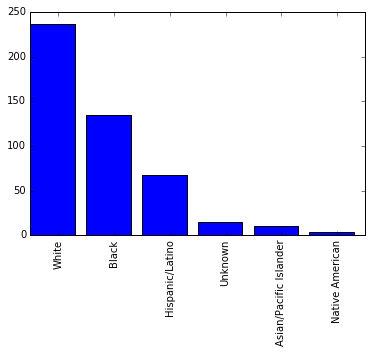

In [13]:
police_killings_counts = police_killings["raceethnicity"].value_counts()
N = 6
ind = np.arange(N)
print(ind, police_killings_counts)
plt.bar(ind, police_killings_counts)
plt.xticks(np.arange(6)+.5, police_killings_counts.index.values , rotation=90) 

Let's look at the total amount fo race percentage in US in 2010 year and compare with previous plot.
That info you can find here: http://www.census.gov/prod/cen2010/briefs/c2010br-02.pdf

* actually the 2010th year is the latest which was updated with race information

In [14]:
total_raceethnicity_US_2010 = pd.read_csv("D://YandexDisk//ML//Dataquest//raceethnicity_US_2010.csv", encoding="ISO-8859-1")
total_raceethnicity_US_2010.head(8)

,race,quantity,percentage
0,White,196817552,63.7
1,Black,37685848,12.2
2,Asian,14465124,4.7
3,American Indian or Alaska Native,2247098,0.7
4,Native Hawaiian or other Pacific Islander,481576,0.2
5,some other race,604265,0.2
6,two or more races,5966481,1.9
7,Hispanic or Latino,50477594,16.3


([<matplotlib.axis.XTick at 0x1e7ef13aa20>,
 <a list of 8 Text xticklabel objects>)

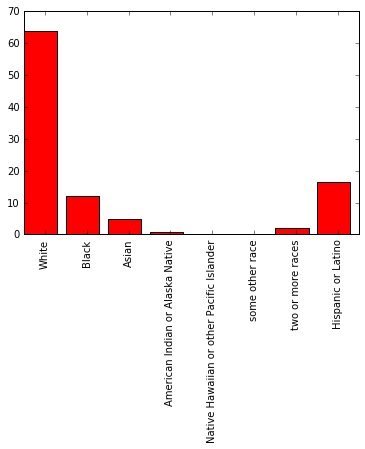

In [15]:
plt.bar(np.arange(8), total_raceethnicity_US_2010["percentage"].tolist(), color="r")
plt.xticks(np.arange(8)+.5, total_raceethnicity_US_2010["race"].tolist(), rotation=90) 

let's plot them together

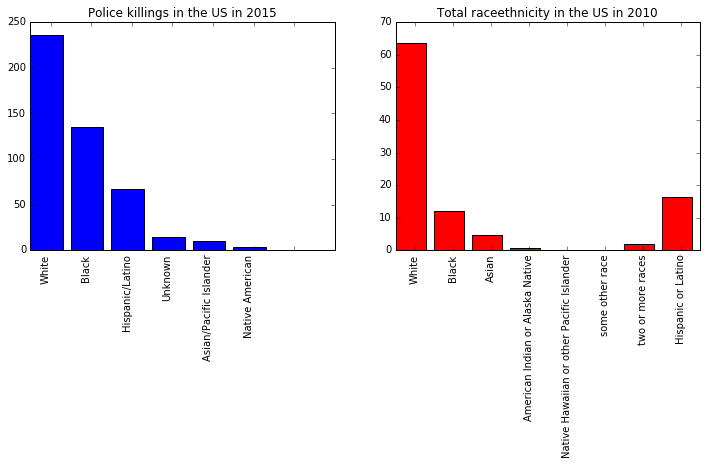

In [16]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)


ax1.bar(ind, police_killings_counts)
ax2.bar(np.arange(8), total_raceethnicity_US_2010["percentage"].tolist(), color="r")

ax1.set_xticklabels(police_killings_counts.index.values , rotation=90, horizontalalignment="right") 
ax2.set_xticklabels(total_raceethnicity_US_2010["race"].tolist(), rotation=90) 
xlabels_positions =  np.arange(8)+.5
ax1.set_xticks(xlabels_positions)
ax2.set_xticks(xlabels_positions)
ax1.set_title("Police killings in the US in 2015")
ax2.set_title("Total raceethnicity in the US in 2010")

Now we see that only "black" bars are different for those charts.

# 3: Shootings By Regional Income

The p_income column is median personal income by census area. Looking at this will tell us if more of the shootings happened in less affluent areas or more affluent areas.

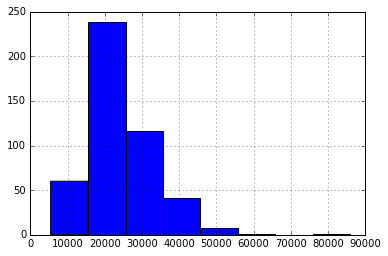

In [17]:
income = police_killings[police_killings["p_income"] != "-"]["p_income"]
income = income.astype(int)
income.hist(bins=8)

The most part of that people had $12500 - $25000 income per year. Let't compare this chart with total statistics of US citizen income. 
Take the data from income_US_2010.csv http://www.census.gov/hhes/www/cpstables/032011/perinc/new01_001.htm

In [20]:
income_US_2010 = pd.read_csv("D://YandexDisk//ML//Dataquest//income_US_2010.csv")
income_US_2010.head(10)

,Income range,Number of individuals (thousands),Percent in group,Percent Below
0,2500,12686,6.00,0.00
1,4999,7202,3.41,6.00
2,7499,9645,4.56,9.40
3,9999,12157,5.75,13.96
4,12499,13115,6.20,19.71
5,14999,9491,4.49,25.91
6,17499,11452,5.41,30.40
7,19999,8433,3.99,35.82
8,22499,10894,5.15,39.80
9,24999,6472,3.06,44.95


<Container object of 41 artists>

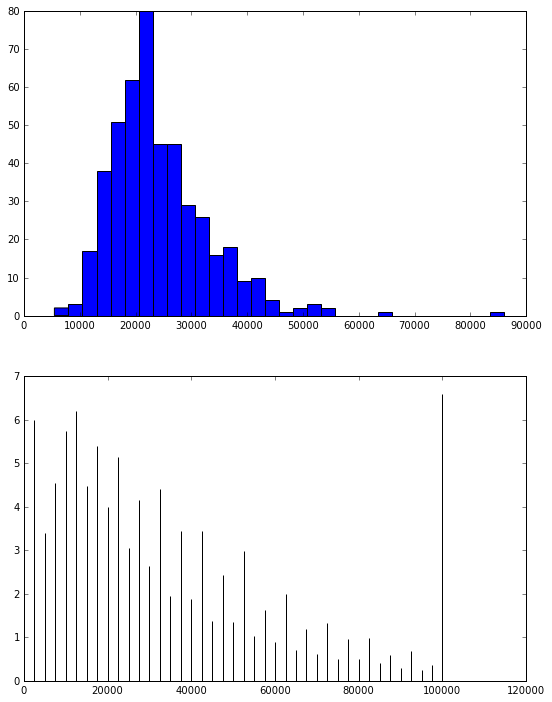

In [21]:
# plt.bar(income_US_2010["Income range"], income_US_2010["Percent in group"], width=0.8)

fig = plt.figure(figsize=(9,12))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.hist(income, bins=32)
ax2.bar(income_US_2010["Income range"], income_US_2010["Percent in group"], width=0.8, color="r")

Now we see that police victims are not the poorest people in the US

Since we have geographic data, we can look at breakdowns of shootings by region.
To accomplish this, we'll need to leverage external data. We can find state-level data on population here https://www.census.gov/popest/data/state/asrh/2015/SCPRC-EST2015-18+POP-RES.html. 
Here are the relevant columns in the dataset:

POPESTIMATE2015 -- the estimated 2015 population of the state.
NAME -- the name of the state, as a string (such as Texas).
STATE -- the numeric Census code of the state.

There's a problem here, though. In the police_killings Dataframe, the state column gives us a state name abbreviation, like CA. We can't use this to match the population with the right state in police_killings, because the population dataset only has complete state names. Instead, we'll use the state_fp column in police_killings to match. state_fp contains Census codes, which correspond to the STATE column in the population dataset.

We can use the merge() method on Dataframes to merge a Dataframe with another Dataframe that shares a common column.

In [23]:
state_pop = pd.read_csv("D://YandexDisk//ML//Dataquest//state_population_US_2015.csv")
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,10,0,0,0,United States,321418820,247773709,77.1
1,40,3,6,1,Alabama,4858979,3755483,77.3
2,40,4,9,2,Alaska,738432,552166,74.8
3,40,4,8,4,Arizona,6828065,5205215,76.2
4,40,3,7,5,Arkansas,2978204,2272904,76.3


In [24]:

counts = police_killings["state_fp"].value_counts()
states = pd.DataFrame({"STATE": counts.index, "shootings": counts})

states = state_pop.merge(states, on="STATE")

states["pop_millions"] = states["POPESTIMATE2015"] / 1000000 
states["rate"] = states["shootings"] / states['pop_millions']
states = states.sort("rate", ascending=False)
states

C:\Users\andrpotapov\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,shootings,pop_millions,rate
35,40,3,7,40,Oklahoma,3911338,2950017,75.4,22,3.911338,5.624674
2,40,4,8,4,Arizona,6828065,5205215,76.2,25,6.828065,3.661359
27,40,2,4,31,Nebraska,1896190,1425853,75.2,6,1.896190,3.164240
11,40,4,9,15,Hawaii,1431603,1120770,78.3,4,1.431603,2.794071
1,40,4,9,2,Alaska,738432,552166,74.8,2,0.738432,2.708442
12,40,4,8,16,Idaho,1654930,1222093,73.8,4,1.654930,2.417021
31,40,4,8,35,New Mexico,2085109,1588201,76.2,5,2.085109,2.397956
18,40,3,7,22,Louisiana,4670724,3555911,76.1,11,4.670724,2.355095
5,40,4,8,8,Colorado,5456574,4199509,77.0,12,5.456574,2.199182
7,40,3,5,10,Delaware,945934,741548,78.4,2,0.945934,2.114312


From that table we can clearly see that Oklahoma is the most liable to police killings due to high rate of police killings per one million people in ezch state.

The less liable is Connecticut.

# 4: State By State Differences

Why do some states have a much higher rate of police killings than others? Is it due to random chance, or is there an underlying factor that could explain it? It will be good to dive more into the data to find any significant differences.

We'll first need to split police_killings into two parts. One part will have the 10 states with the lowest shooting rate, and the other will have the 10 states with the highest shooting rate.

You'll then be able to look at a few columns that could reveal interesting differences:

pop -- population of the census area where the incident occurred.
county_income -- median household income in the county.
share_white -- the percentage (out of 100) of whites in the census area.
share_black -- the percentage (out of 100) of blacks in the census area.
share_hispanic -- the percentage (out of 100) of hispanics in the census area.

In [25]:
pk = police_killings[police_killings["share_white"] != "-"] 
pk = police_killings[police_killings["share_black"] != "-"] 
pk = police_killings[police_killings["share_hispanic"] != "-"] 

pk["share_white"].astype(float)
pk["share_black"].astype(float)
pk["share_hispanic"].astype(float);

Let compare 10 states with the highest shooting rate and 10 states with the lowest shooting rate

In [26]:
highest_shooting_states =pk[pk["state_fp"].isin(states["STATE"].iloc[0:9])]
lowest_shooting_states = pk[pk["state_fp"].isin(states["STATE"].iloc[len(states)-10:len(states)])]

In [27]:
highest_shooting_states["share_hispanic"].mean

<bound method Series.mean of 1       0.5
5        79
21      2.9
24      9.7
42     56.6
49     81.5
50      1.7
55      8.1
59       28
63        1
67     51.3
76     53.4
90     10.3
92     17.8
95       36
96     49.8
99       36
103     6.4
105    20.3
111     1.9
114     0.9
120     2.6
127    28.8
130    10.5
143    30.3
149    30.3
150    10.1
151    23.6
152     3.8
154    71.2
       ... 
307     4.4
312     1.4
321     9.8
324      12
329    11.1
334    61.8
341      41
343       0
344     4.5
349    55.4
353     5.4
354    52.9
367     7.3
371     5.2
386    10.6
393    10.1
400    11.9
403    44.4
413    42.3
415       2
419      21
420    40.8
425     1.5
429     5.6
437       4
439    19.5
441    55.3
446     1.1
447     8.4
449     4.2
Name: share_hispanic, dtype: object>

In [28]:
lowest_shooting_states["share_hispanic"].describe()

count     55
unique    52
top        0
freq       2
Name: share_hispanic, dtype: object